In [56]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from classifier import *
torch.cuda.is_available(), torch.backends.cudnn.enabled

(True, True)

In [57]:
PATH = Path('/home/sean/hpc-home/skin_cancer/')
test_folder = 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
test_csv = PATH / 'ISIC/test_isic17.csv'

test_mel_p = PATH / 'ISIC/test_mel_17.csv'
test_ker_p = PATH / 'ISIC/test_ker_17.csv'
test_all_p = PATH / 'ISIC/test_all_17.csv'
test_raw_p = PATH / 'ISIC/test_raw_17.csv'

train_skp = PATH / 'train_multi_sk.csv'
train_melp = PATH / 'train_multi_mel.csv'
train_all = PATH / 'train_multi.csv'
train_raw = PATH / 'train_multi_raw.csv'

%ls $PATH

dermofit/                        train_multi_half_ia_nervi.csv*
ISIC/                            train_multi_mel.csv*
isic18_p3_test_data*             train_multi_no_ia_nervi.csv*
isic_archive/                    train_multi_raw.csv*
models/                          train_multi_raw_half_ia_nervi.csv*
ph2dataset/                      train_multi_raw_no_ia_nervi.csv*
test_isic17_dermofitLabels.csv*  train_multi_sk.csv*
tmp/                             train_seg_isic17_dermo.csv*
train_dermofit_isic17.csv*       train_test_Mel_seg_isic17_dermo.csv*
train_Mel_seg_isic17_dermo.csv*  val_isic17.csv*
train_multi.csv*


## Setup Trainer

In [58]:
# The network architecture to use, resnet34 is a good start, will get better performance with resnext50 or inceptionv4
arch=resnet101
# image size
sz=224
bs=64
train_csv = train_all
val_idx = list(range(5615 - 150, 5615))
# len(train_df) = 5615
test_csv = test_all_p
w_name = 'resnet101_all'

trainer = ClassifierTrainer(PATH, arch, sz, bs, train_csv, 
                  test_folder=test_folder, val_idx=val_idx, sn=w_name, num_workers=4, test_csv=test_csv)

Saving model as "resnet101_all"
Dataset has: ['keratosis', 'melanoma', 'nevus'] classes


 85%|████████▍ | 73/86 [00:06<00:01, 11.74it/s, loss=1.2]  


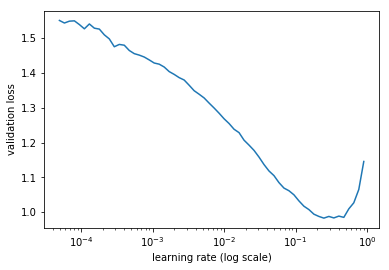

In [4]:
trainer.lr_find()

In [6]:
trainer.set_lr(1e-2)
trainer.init_fit(w_name + '_1')

epoch      trn_loss   val_loss   accuracy                  
    0      0.494372   1.572897   0.513333  
    1      0.382344   1.431871   0.533333                  



epoch      trn_loss   val_loss   accuracy                  
    0      0.341446   1.443237   0.546667  
    1      0.309397   1.51154    0.553333                  



epoch      trn_loss   val_loss   accuracy                  
    0      0.370357   1.682567   0.54      

Saved weights as "resnet101_all_1"


In [59]:
trainer.load(w_name + '_1')

In [54]:
vres = trainer.test_val(tta=False, sf=False)

Accuracy = 0.54
Confusion Matrix:
[[ 0  5 37]
 [ 0  6 24]
 [ 0  3 75]]
AUC for class 0, id keratosis = 0.76
AUC for class 1, id melanoma = 0.75
AUC for class 2, id nevus = 0.77


In [60]:
tres = trainer.test_eval(tta=False, sf=False)

Loading ys from csv; shape (600,); vals [0 1 2]; in folder "ISIC/ISIC-2017_Test_v2_Data_Classification/"
Accuracy = 0.20
Confusion Matrix:
[[  0  36  81]
 [  0  32 361]
 [  0   4  86]]
AUC for class 0, id keratosis = 0.55
AUC for class 1, id melanoma = 0.37
AUC for class 2, id nevus = 0.52


In [40]:
fnames, _, _ = csv_source(trainer.test_folder, trainer.test_csv, suffix='')
fnames,_ = parse_csv_labels(trainer.test_csv, True, ' ')

In [61]:
trainer.inter_fit(w_name + '_2')

epoch      trn_loss   val_loss   accuracy                  
    0      0.332072   1.537775   0.56      
    1      0.340891   1.637344   0.56                      
    2      0.327527   1.660308   0.573333                  
    3      0.331596   1.67025    0.573333                  
    4      0.31588    1.703061   0.56                      
    5      0.314274   1.696999   0.566667                  
    6      0.290934   1.693178   0.58                      

Saved weights as "resnet101_all_2"


In [62]:
trainer.test_eval(tta=False, sf=False)

Loading ys from csv; shape (600,); vals [0 1 2]; in folder "ISIC/ISIC-2017_Test_v2_Data_Classification/"
Accuracy = 0.20
Confusion Matrix:
[[  0  51  66]
 [  0  43 350]
 [  0  10  80]]
AUC for class 0, id keratosis = 0.57
AUC for class 1, id melanoma = 0.35
AUC for class 2, id nevus = 0.52


[array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
        1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2,
        2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
        1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2,
        2,

In [63]:
trainer.final_fit(w_name + '_3')

  0%|          | 0/86 [00:00<?, ?it/s]

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

In [ ]:
trainer.test_val(tta=False, sf=False)

In [ ]:
trainer.test_eval(tta=False, sf=False)